# Reconocimiento de números

In [14]:
import numpy
import time #para calcular tiempos
import scipy.special #para la función sigmoide
import matplotlib.pyplot as plt #para representar las gráficas
#para asegurarnos de que las gráficas estan en este cuaderno y no una ventana externa
%matplotlib inline 

In [2]:
#definicion de la clase 
class neuralNetwork:
    #inicialización de la red neuronal
    def __init__(self,nodosent,nodosocu,nodossal,aprendizaje):
        #establecemos el numero de nodos para la capa de entrada, la oculta y la de salida (e,o,s respectivamente)
        self.enodos=nodosent
        self.onodos=nodosocu
        self.snodos=nodossal
        
        #matrices de peso peo (peso entrada-coulta), pos (peso oculta-salida)
        self.weo=numpy.random.normal(0.0, pow(self.onodos, -0.5),(self.onodos, self.enodos))
        self.wos = numpy.random.normal(0.0, pow(self.snodos, -0.5),(self.snodos, self.onodos))

        #tasa de aprendizaje
        self.ta=aprendizaje
        
        #función de activación (sigmoide)
        self.activacion_funcion= lambda x: scipy.special.expit(x)
        
        pass
        
    #función entrenamiento
    def entrena(self, lista_entrada, lista_objetivo):
        #convertimos las entradas y los objetivos en un array de 2 dimensiones
        entradas = numpy.array(lista_entrada, ndmin=2).T
        objetivos = numpy.array(lista_objetivo, ndmin=2).T
        
        #calculamos las entradas a la capa oculta
        entrada_oculta = numpy.dot(self.weo, entradas)
        #calculamos las salidas de la capa oculta
        salida_oculta=self.activacion_funcion(entrada_oculta)
        #calculamos las entradas de la capa final
        entrada_final = numpy.dot(self.wos, salida_oculta)
        #calculamos la salida de la capa final
        salida_final = self.activacion_funcion(entrada_final)

        #calculo de errores
        errores_salida = objetivos - salida_final

        #el error oculto es errores_salida, dividido entre los pesos y recombinado con los nodos ocultos (ver en la teoría capítulo 1)
        errores_oculta=numpy.dot(self.wos.T, errores_salida)
        
        #actualización de los pesos entre la capa oculta y la final
        self.wos += self.ta * numpy.dot((errores_salida *salida_final * (1.0 -salida_final)),numpy.transpose(salida_oculta))
        
        #actualizacion de los pesos entre la capa de entrada y la oculta
        self.weo += self.ta * numpy.dot((errores_oculta *salida_oculta * (1.0 - salida_oculta)), numpy.transpose(entradas))

    
        pass
    
    #probamos la red neuronal
    def prob(self,lista_entrada):
        #convertimos las entradas en un array dimensión 2
        entradas = numpy.array(lista_entrada, ndmin=2).T
        
        #calculamos la entrada de la capa oculta
        entrada_oculta = numpy.dot(self.weo, entradas)
        
        #calculamos la salida de la capa oculta
        salida_oculta = self.activacion_funcion(entrada_oculta)

        #calcula la entrada en la capa final
        entrada_final= numpy.dot(self.wos, salida_oculta)
        #calcula la salida de la capa final
        salida_final = self.activacion_funcion(entrada_final)

        return salida_final

In [3]:
#numero de nodos en cada capa
nodosent=784 #ya que las imágenes son de 28*28 píxeles
nodosocu = 200
nodossal = 10 #por tener 10 opciones de números

#tasa aprendizaje
aprendizaje=0.1

## Red neuronal con 60000 datos de entrenamiento

In [4]:
start1=time.time() #inicializamos el tiempo
# ejemplo de red neuronal
n = neuralNetwork(nodosent,nodosocu,nodossal,aprendizaje)

#cargamos el archivo de los datos de entrenamiento
archivo_datos=open("mnist_train.csv","r")
lista_datos=archivo_datos.readlines()
archivo_datos.close()


for record in lista_datos:
    #separamos los datos de las listas por las comas
    valores=record.split(',')
    #ponemos los valores en la escala que nos interesa
    #los datos comienzan en la posición uno ya que la 0 es la respuesta correcta del número del cual se trata
    entrada_escalada = (numpy.asfarray(valores[1:]) / 255.0 * 0.99)+0.01
    #creamos los objetivos salida (todos los valores 0,01 menos el deseado que es 0,99)
    objetivos = numpy.zeros(nodossal) + 0.01
    objetivos[int(valores[0])]=0.99
    n.entrena(entrada_escalada,objetivos)
    pass
tiempo1=time.time()-start1
print(tiempo1)

177.34344482421875


In [5]:
#ahora vamos a poner a prueba la red neuronal
archivo_test = open("mnist_test.csv", 'r')
lista_test = archivo_test.readlines()
archivo_test.close()

#creamos una lista vacía para llevar el tanteo de los aciertos y fallos
tanteo=[]

for record in lista_test:
    #separamos en la lista por comas
    valores = record.split(',')
    #tomamos la etiqueta correcta
    etiqueta_correcta = int(valores[0])
    #escalamos las entradas
    entradas = (numpy.asfarray(valores[1:]) / 255.0 * 0.99)+0.01
    
    salidas = n.prob(entradas)
    #el mayor indice de salida corresponde a la etiqueta
    etiqueta=numpy.argmax(salidas)
    #añadimos a la lista tanteo un 1 si ha acertado y un 0 si no
    if (etiqueta == etiqueta_correcta):
        tanteo.append(1)
    else:
        tanteo.append(0)
        pass
    pass

### Rendimiento de la red

In [6]:
tanteo_array=numpy.asarray(tanteo)
print("rendimiento= ",tanteo_array.sum()/tanteo_array.size)

rendimiento=  0.959


## Red neuronal con 30000 datos de entrenamiento

In [7]:
start2=time.time()
#red neuronal con menor entrenamiento
n2 = neuralNetwork(nodosent,nodosocu,nodossal,aprendizaje)

#cargamos el archivo de los datos de entrenamiento
archivo_datos2=open("mnist_train2.csv","r")
lista_datos2=archivo_datos2.readlines()
archivo_datos2.close()


for record in lista_datos2:
    #separamos los datos de las listas por las comas
    valores2=record.split(',')
    #ponemos los valores en la escala que nos interesa
    #los datos comienzan en la posición uno ya que la 0 es la respuesta correcta del número del cual se trata
    entrada_escalada2 = (numpy.asfarray(valores2[1:]) / 255.0 * 0.99)+0.01
    #creamos los objetivos salida (todos los valores 0,01 menos el deseado que es 0,99)
    objetivos2 = numpy.zeros(nodossal) + 0.01
    objetivos2[int(valores2[0])]=0.99
    n2.entrena(entrada_escalada2,objetivos2)
    pass
tiempo2=time.time()-start2
print("Tiempo de espera ",tiempo2)

Tiempo de espera  80.07762575149536


In [8]:
#ahora vamos a poner a prueba la red neuronal
archivo_test = open("mnist_test.csv", 'r')
lista_test = archivo_test.readlines()
archivo_test.close()

#creamos una lista vacía para llevar el tanteo de los aciertos y fallos
tanteo2=[]

for record in lista_test:
    #separamos en la lista por comas
    valores = record.split(',')
    #tomamos la etiqueta correcta
    etiqueta_correcta = int(valores[0])
    #escalamos las entradas
    entradas = (numpy.asfarray(valores[1:]) / 255.0 * 0.99)+0.01
    
    salidas = n2.prob(entradas)
    #el mayor indice de salida corresponde a la etiqueta
    etiqueta2=numpy.argmax(salidas)
    #añadimos a la lista tanteo un 1 si ha acertado y un 0 si no
    if (etiqueta2 == etiqueta_correcta):
        tanteo2.append(1)
    else:
        tanteo2.append(0)
        pass
    pass

### Rendimiento de la red

In [9]:
tanteo2_array=numpy.asarray(tanteo2)
print("rendimiento= ",tanteo2_array.sum()/tanteo2_array.size)

rendimiento=  0.9461


## Red neuronal con 25000 datos de entrenamiento

In [10]:
start3=time.time()
#red neuronal con aún menor entrenamiento
n3 = neuralNetwork(nodosent,nodosocu,nodossal,aprendizaje)

#cargamos el archivo de los datos de entrenamiento
archivo_datos3=open("mnist_train3.csv","r")
lista_datos3=archivo_datos3.readlines()
archivo_datos3.close()


for record in lista_datos3:
    #separamos los datos de las listas por las comas
    valores3=record.split(',')
    #ponemos los valores en la escala que nos interesa
    #los datos comienzan en la posición uno ya que la 0 es la respuesta correcta del número del cual se trata
    entrada_escalada3 = (numpy.asfarray(valores3[1:]) / 255.0 * 0.99)+0.01
    #creamos los objetivos salida (todos los valores 0,01 menos el deseado que es 0,99)
    objetivos3 = numpy.zeros(nodossal) + 0.01
    objetivos3[int(valores2[0])]=0.99
    n3.entrena(entrada_escalada3,objetivos3)
    pass
tiempo3=time.time()-start3
print(tiempo3)

65.21252346038818


In [11]:
#ahora vamos a poner a prueba la red neuronal 25000 valores entrenamiento
archivo_test = open("mnist_test.csv", 'r')
lista_test = archivo_test.readlines()
archivo_test.close()

#creamos una lista vacía para llevar el tanteo de los aciertos y fallos
tanteo3=[]

for record in lista_test:
    #separamos en la lista por comas
    valores = record.split(',')
    #tomamos la etiqueta correcta
    etiqueta_correcta = int(valores[0])
    #escalamos las entradas
    entradas = (numpy.asfarray(valores[1:]) / 255.0 * 0.99)+0.01
    
    salidas = n3.prob(entradas)
    #el mayor indice de salida corresponde a la etiqueta
    etiqueta3=numpy.argmax(salidas)
    #añadimos a la lista tanteo un 1 si ha acertado y un 0 si no
    if (etiqueta3 == etiqueta_correcta):
        tanteo3.append(1)
    else:
        tanteo3.append(0)
        pass
    pass

### Rendimiento de la red

In [12]:
tanteo3_array=numpy.asarray(tanteo3)
print("rendimiento= ",tanteo3_array.sum()/tanteo3_array.size)

rendimiento=  0.1135


### Probamos un ejemplo


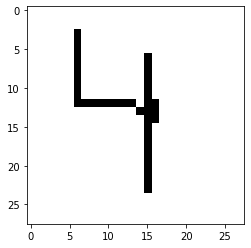

In [136]:

numerito=plt.imread("numerito.png")
matplotlib.pyplot.imshow(numerito, cmap='Greys',
interpolation='None')

In [137]:
aux=[]
for i in range(28):
    for j in range(28):
        if list(numerito[i][j]) == [0,0,0,1]:
            aux.append(0)
        else:
            aux.append(1)
numerito=aux

In [138]:
numerito

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [139]:
salida1=n.prob(numerito)
etiqueta1=numpy.argmax(salida1)
print("La neurona 1 identifica un ",etiqueta1)

La neurona 1 identifica un  8


In [140]:
salida1

array([[0.11064677],
       [0.00708739],
       [0.20811255],
       [0.08842438],
       [0.00375844],
       [0.02582738],
       [0.05144711],
       [0.00689955],
       [0.57417188],
       [0.02069541]])

In [141]:
salida2=n2.prob(numerito)
etiqueta2=numpy.argmax(salida2)
print("La neurona 2 identifica un ",etiqueta2)

La neurona 2 identifica un  8


In [142]:
salida2

array([[0.0433653 ],
       [0.04143163],
       [0.07737344],
       [0.14051224],
       [0.00764758],
       [0.06004575],
       [0.04990306],
       [0.04323525],
       [0.2519927 ],
       [0.01361059]])

In [143]:
salida3=n3.prob(numerito)
etiqueta3=numpy.argmax(salida3)
print("La neurona 3 identifica un ",etiqueta3)

La neurona 3 identifica un  1


In [144]:
salida3

array([[0.00557838],
       [0.99531039],
       [0.00346659],
       [0.01763354],
       [0.00837361],
       [0.00933981],
       [0.00487057],
       [0.00730805],
       [0.00591872],
       [0.00576704]])